# Data Analyst Associate Case Study Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## Data Validation
Describe the validation tasks you performed and what you found. Have you made any changes to the data to enable further analysis? Remember to describe what you did for every column in the data. 

**The first thing to do is to make sure the data types matched. There were certain things that needed to be updated before we started working:**

**1. Sales was not set to numeric, so the "$ and ," had to be stripped and converted.**
**2. There were only 4 pet types we were looking at, so 2 types had to be removed.**

In [1]:
#imports and info
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('pet_sales.csv')
ps = pd.DataFrame(data)
ps.info()
ps.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_id        879 non-null    int64  
 1   product_category  879 non-null    object 
 2   sales             879 non-null    object 
 3   price             879 non-null    float64
 4   vendor_id         879 non-null    object 
 5   pet_size          879 non-null    object 
 6   pet_type          879 non-null    object 
 7   rating            879 non-null    int64  
 8   re_buy            879 non-null    int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 61.9+ KB


,product_id,product_category,sales,price,vendor_id,pet_size,pet_type,rating,re_buy
0,5040,Equipment,"$123,000",94.81,VC_1605,small,fish,7,1


In [2]:
#Unique categorical values per column
print(ps['product_category'].unique())
print(ps['pet_size'].unique())
print(ps['pet_type'].unique())
print(ps['rating'].sort_values().unique())
print(ps['re_buy'].sort_values().unique())

['Equipment' 'Toys' 'Snack' 'Supplements' 'Bedding' 'Medicine' 'Housing'
 'Food' 'Clothes' 'Accessory' 'Grooming']
['small' 'large' 'extra_small' 'medium' 'extra_large']
['fish' 'cat' 'hamster' 'dog' 'bird' 'rabbit']
[ 1  2  3  4  5  6  7  8  9 10]
[0 1]


In [3]:
#convert sales to numeric
ps['sales'] = ps['sales'].str.replace('$','')
ps['sales'] = ps['sales'].str.replace(",",'')
ps['sales'] = ps['sales'].astype(int)
ps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_id        879 non-null    int64  
 1   product_category  879 non-null    object 
 2   sales             879 non-null    int64  
 3   price             879 non-null    float64
 4   vendor_id         879 non-null    object 
 5   pet_size          879 non-null    object 
 6   pet_type          879 non-null    object 
 7   rating            879 non-null    int64  
 8   re_buy            879 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 61.9+ KB


/var/folders/n6/wgxk50mn6fz_13xl50j6ntbm0000gp/T/ipykernel_81066/4169451869.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ps['sales'] = ps['sales'].str.replace('$','')


In [4]:
#filter out other pets
wantedpets = ['cat','dog','fish','bird']
ps = ps[ps['pet_type'].isin(wantedpets)]

## Data Discovery and Visualization
Describe what you found in the analysis and how the visualizations answer the customer questions in the project brief. In your description you should:
- Include at least two different data visualizations to demonstrate the characteristics of variables
- Include at least one data visualization to demonstrate the relationship between two or more variables
- Describe how your analysis has answered the business questions in the project brief

1. How many products are being purchased more than once?
390 products were purchased more than once

2. Do the products being purchased again have better sales than others?
Only one category stood out for products being purchased again, and it was equipment. Snacks and Toys were the top generators for products that were purchased only once.**

3. What products are more likely to be purchased again for different types of pets?
Equipment for Dogs and Cats were Top 2 in terms of being purchased more than once. However, they did not generate the most revenue out of all repurchased products.


In [5]:
#How many products are being purchased more than once?
q1 = pd.pivot_table(ps,values = 're_buy', index='product_category', aggfunc='sum').sort_values(by='re_buy', ascending=False)

In [6]:
# total number of repurchased products
q1['re_buy'].sum()

390

Q1. How many products are being purchased more than once? The total is 390
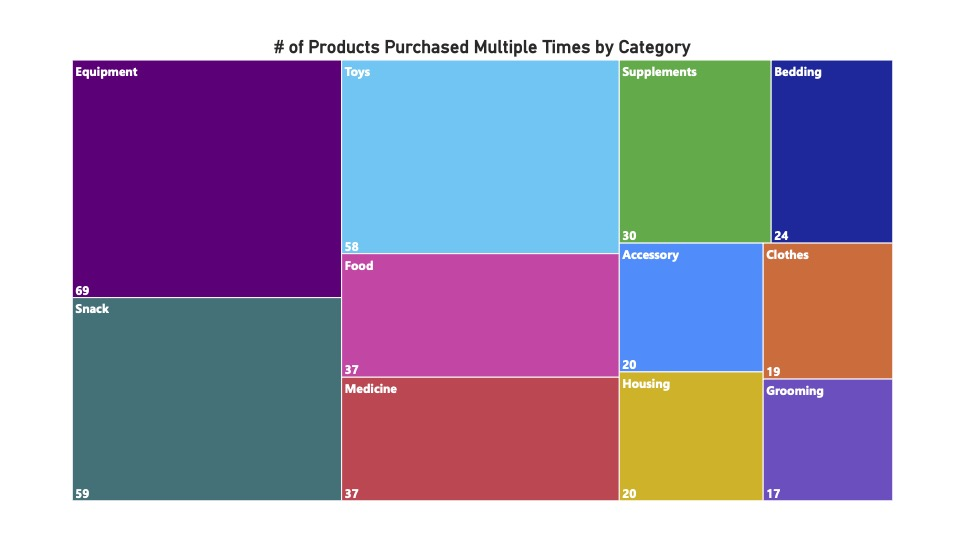

Q2: Do the products being purchased again have better sales than others?
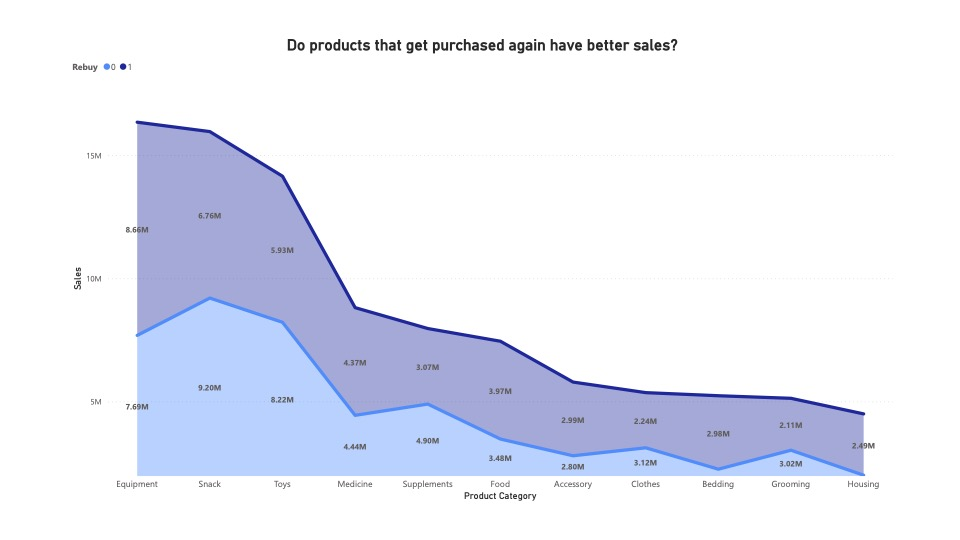

Q3: What products are more likely to be purchased again for different types of pets? Equipment for Dogs and Cats were Top 2 in terms of being purchased more than once.
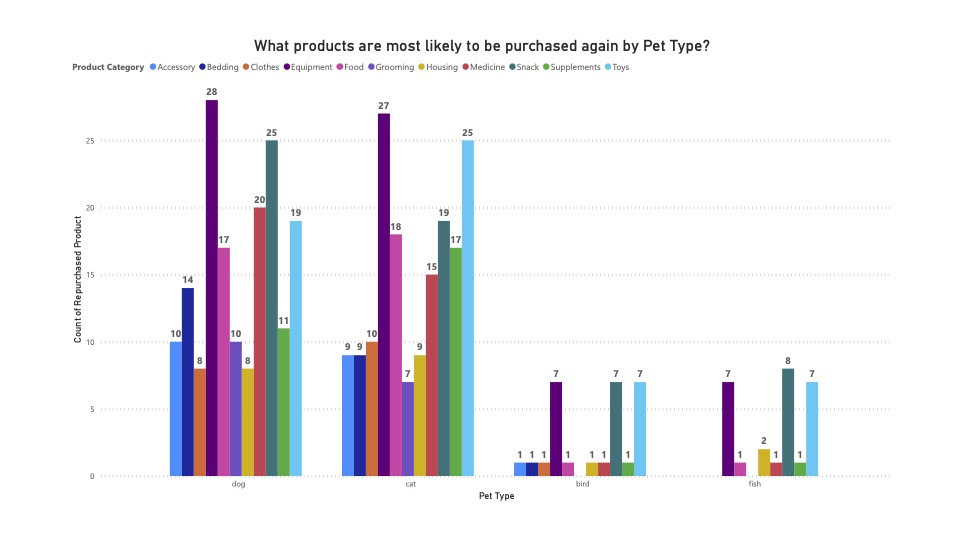

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your case study